In [2]:
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [15]:
data=pd.read_csv('data_with_newfeatures.csv',encoding="latin-1")

In [3]:
data_member = pd.read_csv("./data/members.csv")
data_song_info = pd.read_csv("./data/song_extra_info.csv")
data_song = pd.read_csv("./data/songs.csv")
data_listen = pd.read_csv("./data/train.csv")

In [4]:
data_song = pd.merge(data_song, data_song_info, on="song_id", how="left")

In [5]:
data = pd.merge(data_listen, data_song, on="song_id", how="left")

In [6]:
data = pd.merge(data, data_member, on="msno", how="left")

In [22]:
user_genre = data[data.msno==data.msno.values[1]][['genre_ids']].dropna().groupby(["genre_ids"]).size()

## Features

#below is an exmaple of caculate genre probabilties using  groupby[key1,key2]/groupby[key1]]

In [82]:
data.shape

(7377418, 33)

In [73]:
data[['msno','genre_ids']].groupby(['msno']).size()

msno
++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=     589
++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=     220
++e+jsxuQ8UEnmW40od9Rq3rW7+wAum4wooXyZTKJpk=     108
++xWL5Pbi2CpG4uUugigQahauM0J/sBIRloTNPBybIU=      16
+/SKX44s4ryWQzYzuV7ZKMXqIKQMN1cPz3M8CJ8CFKU=     222
+/USTSczbe/vrPPatLFT8TPKNBt0J5ValJhfr3vNALI=       7
+/UwoUi5+rNj/F6RO6gMrMhOy0oTzs90MWKVNZs4+Wg=     199
+/tv7+daiSsEEBhNDnQZL32wdfmr2GSYmX2aQPGONRY=       7
+/vppV5BoMKMNAk7Bej5rjhKeE6VqrRjUv8EYXoAjyM=      32
+0+XaewkS3za58vHwKCVGwRYRvjig4lTtKDV/tOkzbU=      95
+06pc1V8QfywrGOTNln/7X7Md8dA8fVOIU37n2M5mv8=     764
+0B4aHABar5ltaWDG4M6KCzNxpD6wnsvZpvh+o9KgtE=     426
+0CxUZKWtmqPKlW+2VF+hY2rfq+Dh9JM/AqoZJnCr4E=      72
+0U8n45rrg6b5WCy3wpqOUYCwZyLqecr3lux9K6ahMk=     263
+0e0lK2leRcjxHEHKxIsaVPA+kMIl7m7cpUJDsVvdtQ=       7
+0e12C+p9dzDbOvKjt8eElKH9yZPshAstxjm60XFgSM=     455
+0fIn7dpNl78+g/0mdltKgWRW9sjv4HjTgrB+RJy1EM=      44
+0fsyPeueRG/vv7UWK0vvhaRK8nRU0P2yK6UrWUvk8o=      81
+0qp8s9V3eIIPGNZpQzmFNOetFXHApbV7WGgVXcis

In [72]:
data[['msno','genre_ids']].groupby(['msno','genre_ids']).size()

msno                                          genre_ids  
++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=  1180             1
                                              1259            66
                                              139              5
                                              1609            19
                                              1616             9
                                              1616|1609       15
                                              2022            13
                                              359             37
                                              451             15
                                              458             76
                                              465            277
                                              465|1259         5
                                              474             37
                                              726              1
                                

In [71]:
data[['msno','genre_ids']].groupby(['msno','genre_ids']).size()/data[['msno','genre_ids']].groupby(['msno']).size()

msno                                          genre_ids  
++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=  1180           0.001698
                                              1259           0.112054
                                              139            0.008489
                                              1609           0.032258
                                              1616           0.015280
                                              1616|1609      0.025467
                                              2022           0.022071
                                              359            0.062818
                                              451            0.025467
                                              458            0.129032
                                              465            0.470289
                                              465|1259       0.008489
                                              474            0.062818
                                

In [101]:
def feature (keys):
    key1=keys[0]
    key2=keys[1]
    data2=data[[key1,key2]].dropna()
    r=data2.groupby([key1,key2]).size()/data2.groupby([key1]).size()
    r=r.dropna()
    r=r.reset_index()
    return r

# compute all featuers



In [102]:
data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,20110525,20170911
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003,1,0,NaN,7,20120102,20171005


In [116]:
all_keys=[('msno','source_system_tab'),('msno','source_screen_name'),('msno','source_type'),
          ('msno','genre_ids'),('msno','artist_name'),('msno','composer'),('msno','lyricist'),
          ('msno','language'),('city','genre_ids'),('city','bd'),('city','registered_via'),
          ('msno','song_length')]

In [118]:
dic={}
for i in all_keys:
    keys=i
    dic[keys[0]+'_'+keys[1]]=feature(keys)

In [133]:
new_data=data.copy()
for i in dic.keys():
    print(i)
    f=dic[i]
    f.rename(columns={0:i}, inplace=True)
    key1=i.split('_',1)[0]
    key2=i.split('_',1)[1]
    new_data=pd.merge(new_data,f,how='left',on=[key1,key2])

msno_source_system_tab
msno_source_screen_name
msno_source_type
msno_genre_ids
msno_artist_name
msno_composer
msno_lyricist
msno_language
city_genre_ids
city_bd
city_registered_via
msno_song_length


In [35]:
columns=[6]+list(range(-12,-1))
prob_data=data.iloc[:,columns]

In [37]:
prob_data=prob_data.drop(['msno_lyricist'],axis=1)

In [38]:
prob_data=prob_data.dropna()

In [39]:
prob_data.head()

,target,msno_source_system_tab,msno_source_screen_name,msno_source_type,msno_genre_ids,msno_artist_name,msno_composer,msno_language,city_genre_ids,city_bd,city_registered_via
0,1,0.161132,0.126146,0.25930,0.030129,0.000544,0.000579,0.531034,0.015362,0.946544,0.703413
2,1,0.885852,0.887279,0.21865,0.068404,0.003215,0.001957,0.183280,0.026538,0.066811,0.589814
3,1,0.885852,0.887279,0.21865,0.001629,0.001608,0.001957,0.016077,0.000003,0.066811,0.589814
4,1,0.161132,0.126146,0.25930,0.007024,0.000181,0.000290,0.531034,0.004974,0.946544,0.703413
5,1,0.161132,0.126146,0.25930,0.117930,0.000363,0.000290,0.531034,0.024097,0.946544,0.703413


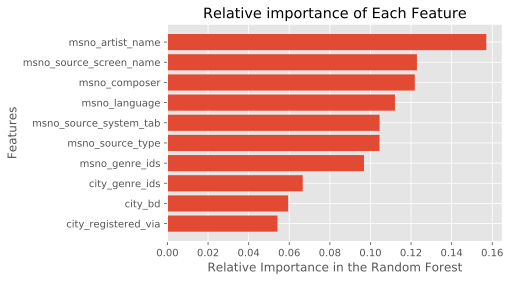

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
X=prob_data.iloc[:100000,1:]
Y=prob_data.iloc[:100000,0]
clf.fit(X,Y)
importance_list = clf.feature_importances_
name_list = X.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [47]:
import pandas as pd
from statsmodels.formula.api import ols

In [57]:
data.head()

,Unnamed: 0,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,...,msno_source_type,msno_genre_ids,msno_artist_name,msno_composer,msno_lyricist,msno_language,city_genre_ids,city_bd,city_registered_via,msno_song_length
0,0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,...,0.25930,0.030129,0.000544,0.000579,NaN,0.531034,0.015362,0.946544,0.703413,0.000544
1,1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,...,0.21865,0.068404,0.038585,NaN,NaN,0.183280,0.026538,0.066811,0.589814,0.001608
2,2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,...,0.21865,0.068404,0.003215,0.001957,NaN,0.183280,0.026538,0.066811,0.589814,0.001608
3,3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,...,0.21865,0.001629,0.001608,0.001957,NaN,0.016077,0.000003,0.066811,0.589814,0.001608
4,4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,...,0.25930,0.007024,0.000181,0.000290,NaN,0.531034,0.004974,0.946544,0.703413,0.000181


In [56]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
diabetes = datasets.load_diabetes()


X2 = sm.add_constant(X)
est = sm.Logit(Y, X2)
est2 = est.fit()
print(est2.summary2())

Optimization terminated successfully.
         Current function value: 0.682203
         Iterations 4
                             Results: Logit
Model:                Logit              No. Iterations:     4.0000      
Dependent Variable:   target             Pseudo R-squared:   0.015       
Date:                 2018-12-13 11:20   AIC:                7240359.4668
No. Observations:     5306584            BIC:                7240507.7959
Df Model:             10                 Log-Likelihood:     -3.6202e+06 
Df Residuals:         5306573            LL-Null:            -3.6737e+06 
Converged:            1.0000             Scale:              1.0000      
-------------------------------------------------------------------------
                         Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
const                   -0.5368   0.0032 -166.3710 0.0000 -0.5431 -0.5304
msno_source_system_tab   0.1999   0.0048

# Logistic Regression with L1 Penalty

In [54]:
from sklearn.linear_model import LogisticRegression
X=prob_data.iloc[:,1:]
Y=prob_data.iloc[:,0]
log = LogisticRegression(penalty='l1', solver='liblinear')
log.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
log.coef_[0]

array([ 0.19961463,  0.8192412 , -0.1216508 , -0.17282626,  0.34607715,
       -1.03515337,  0.35133406,  0.10145878, -0.12292479,  0.14239358])

In [76]:
X.columns

Index(['msno_source_system_tab', 'msno_source_screen_name', 'msno_source_type',
       'msno_genre_ids', 'msno_artist_name', 'msno_composer', 'msno_language',
       'city_genre_ids', 'city_bd', 'city_registered_via'],
      dtype='object')

In [80]:
df=pd.DataFrame(log.coef_[0][:].reshape(1,-1))
df.columns=X.columns
df

,msno_source_system_tab,msno_source_screen_name,msno_source_type,msno_genre_ids,msno_artist_name,msno_composer,msno_language,city_genre_ids,city_bd,city_registered_via
0,0.199615,0.819241,-0.121651,-0.172826,0.346077,-1.035153,0.351334,0.101459,-0.122925,0.142394


In [58]:
log.score(X, Y)

0.56671485837216562